In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
os.chdir('/content/drive/MyDrive/RAG')

In [7]:
!pwd

/content/drive/MyDrive/RAG


In [1]:

!pip install langchain
!pip install langchain-openai
!pip install langchain-community
!pip install "unstructured[all-docs]"

In [2]:

# install OCR dependencies for unstructured
!sudo apt-get install tesseract-ocr
!sudo apt-get install poppler-utils

!pip install pymupdf==1.24.4

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (6,062 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [8]:

from langchain_community.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader("layoutparser_paper.pdf")
pages = loader.load()

In [9]:
len(pages)

16

In [10]:

print(pages[0].page_content)

LayoutParser: A Uniﬁed Toolkit for Deep
Learning Based Document Image Analysis
Zejiang Shen1 ( ), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain
Lee4, Jacob Carlson3, and Weining Li5
1 Allen Institute for AI
shannons@allenai.org
2 Brown University
ruochen zhang@brown.edu
3 Harvard University
{melissadell,jacob carlson}@fas.harvard.edu
4 University of Washington
bcgl@cs.washington.edu
5 University of Waterloo
w422li@uwaterloo.ca
Abstract. Recent advances in document image analysis (DIA) have been
primarily driven by the application of neural networks. Ideally, research
outcomes could be easily deployed in production and extended for further
investigation. However, various factors like loosely organized codebases
and sophisticated model conﬁgurations complicate the easy reuse of im-
portant innovations by a wide audience. Though there have been on-going
eﬀorts to improve reusability and simplify deep learning (DL) model
development in disciplines like natural language processing

In [9]:
from langchain_community.document_loaders import UnstructuredPDFLoader
loader = UnstructuredPDFLoader('./layoutparser_paper.pdf',
                               strategy='hi_res',
                               extract_images_in_pdf=True,
                               infer_table_structure=True,
                               chunking_strategy="by_title", # section-based chunking
                               max_characters=4000, # max size of chunks
                               new_after_n_chars=3800, # preferred size of chunks
                               combine_text_under_n_chars=2000, # smaller chunks < 2000 chars will be combined into a larger chunk
                               mode='elements')
data = loader.load()

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [10]:
len(data)

18

In [11]:
[doc.metadata['category'] for doc in data]

['CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'Table',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'Table',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement']

In [16]:

print(data[3].page_content)

2 Related Work

Recently, various DL models and datasets have been developed for layout analysis tasks. The dhSegment [22] utilizes fully convolutional networks [20] for segmen- tation tasks on historical documents. Object detection-based methods like Faster R-CNN [28] and Mask R-CNN [12] are used for identifying document elements [38] and detecting tables [30, 26]. Most recently, Graph Neural Networks [29] have also been used in table detection [27]. However, these models are usually implemented individually and there is no uniﬁed framework to load and use such models.

There has been a surge of interest in creating open-source tools for document image processing: a search of document image analysis in Github leads to 5M relevant code pieces 6; yet most of them rely on traditional rule-based methods or provide limited functionalities. The closest prior research to our work is the OCR-D project7, which also tries to build a complete toolkit for DIA. However, similar to the platform dev

In [19]:
from IPython.display import HTML

HTML(data[5].metadata['text_as_html'])


Dataset,| Base Model'|,| Notes
PubLayNet B8]|,F/M,Layouts of modern scientific documents
PRImA,M,Layouts of scanned modern magazines and scientific report
Newspaper,F,Layouts of scanned US newspapers from the 20th century
TableBank,F,Table region on modern scientific and business document
HJDataset,F/M,Layouts of history Japanese documents


In [20]:
data[3]

Document(metadata={'source': './layoutparser_paper.pdf', 'filetype': 'application/pdf', 'languages': ['eng'], 'last_modified': '2024-08-17T03:55:19', 'page_number': 3, 'orig_elements': 'eJzNWW1v2zgS/iuEP7VAJIt6Vw/9kKvb3R6SbtDm7nCXBgFFjW1uZElLSknd7v33myEl28m6C7RAevclMSmSGs4888yLrr7MoIYNNP2NqmYv2KzIioAnReVBUIIX57LyyiwL8Q8IWC6jNM/47ITNNtCLSvQC93yZybbVlWpED8aOa7Fth/5mDWq17nEmDIMA94zT96rq1zjLMzvbtarpad/VVZSFfnLCMh76wfUJ243jxA9pnCaFnx0Z2/U4MTNb08OG7nGhPkH9oRMSZv/BBxX0IHvVNjeyFsbcdLotcVng53nB8YjZUtXQbzuwey/OZ1bcZjWIlb3T1Qya1ezazpr+ZtNWaqnAaiwMwtgLco9nl0H0Ikle8IJ2d7jzphk2JWhcFZEQPXzq7Q72HmpUVsX+2epbWjy9+VL1tRX4sVnSgifApfRiLjIvlin3RFKWXhWVIa8CGcokeUKzxH6Eas5jP3FmsWMecO7HNMGjqPDTYzNuz/eZpojTrPjBpnkPEpVeb0/YndCqHQxbnDE8EmrDRFMx0q2B3rC1uANWAjSsgjuo2w6tuWw1c8rEtaLeGmUYLr81PrtcA6vWH2BFNmVXYXjNhl7V6jMYthzqestk29y19UCKEDVroL9HbBhcGlzbg43d6+GBtMSdy/DHWpm+1UripqqVA52P7/ul/BWVyna69UoUu2IIj3VbGVarW2BvUF2g2Xvv1bt3+J782t7wHA+e5jiKKTSwwYy3UxUer5Zb1ax2b2MjUlHWaDxjfC0u6kVZAz1BSIXptc/OW9MzvdPyT1p0a/YOBo3yv9tfur

In [11]:
! ls -l ./figures

total 329
-rw------- 1 root root 89611 Aug 17 04:59 figure-10-4.jpg
-rw------- 1 root root 42187 Aug 17 04:59 figure-11-5.jpg
-rw------- 1 root root 62655 Aug 17 04:59 figure-13-6.jpg
-rw------- 1 root root 36497 Aug 17 04:59 figure-4-1.jpg
-rw------- 1 root root 31580 Aug 17 04:59 figure-6-2.jpg
-rw------- 1 root root 72034 Aug 17 04:59 figure-9-3.jpg


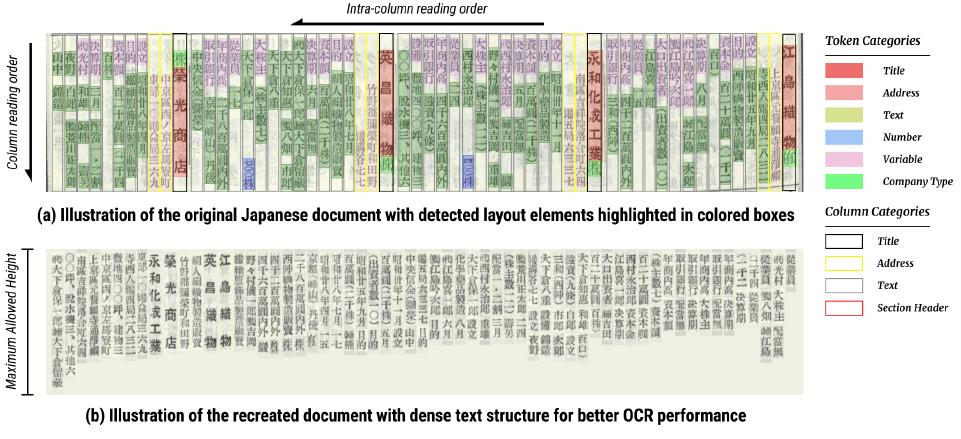

In [13]:

from IPython.display import Image

Image('./figures/figure-10-4.jpg')

In [14]:
!gdown 1DEz13a7k4yX9yFrWaz3QJqHdfecFYRV-

Downloading...
From: https://drive.google.com/uc?id=1DEz13a7k4yX9yFrWaz3QJqHdfecFYRV-
To: /content/drive/MyDrive/RAG/Intel Strategy.docx
100% 1.13M/1.13M [00:00<00:00, 106MB/s]


In [15]:
from langchain_community.document_loaders import UnstructuredWordDocumentLoader


In [16]:
loader = UnstructuredWordDocumentLoader('./Intel Strategy.docx',
                                        strategy='fast',
                                        chunking_strategy="by_title",
                                        max_characters=4000, # max limit of a document chunk
                                        new_after_n_chars=3800, # preferred document chunk size
                                        mode='elements')
data = loader.load()


In [17]:
len(data)

4

# Better Prompting for Consistent Results

In [33]:
import os
from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API_KEY')

In [26]:
from langchain_openai import ChatOpenAI

chatgpt = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0)

## Problematic RAG Prompt

In [27]:
from langchain_core.prompts import ChatPromptTemplate

prompt = """You are an assistant for question-answering tasks.
            Give an answer to the following question with the context provided

            Question:
            {question}

            Context:
            {context}

            Answer:
         """

prompt_template = ChatPromptTemplate.from_template(prompt)

In [28]:

context = """
The cricket world cup champion of 2023 is Australia

The cricket Twenty20 International champion of 2024 is India
"""

question = "Who is the euro 2020 champion?"

qa_rag_chain = (
    prompt_template
      |
    chatgpt
)

In [29]:
response = qa_rag_chain.invoke({'context': context, 'question': question})
print(response.content)

The euro 2020 champion is Italy.


### Better RAG Prompt


In [30]:
from langchain_core.prompts import ChatPromptTemplate

prompt = """You are an assistant for question-answering tasks.
            Use the following pieces of retrieved context to answer the question.
            If no context is present or if you don't know the answer, just say that you don't know.
            Do not make up the answer unless it is there in the provided context.

            Question:
            {question}

            Context:
            {context}

            Answer:
         """

prompt_template = ChatPromptTemplate.from_template(prompt)

In [31]:

qa_rag_chain = (
    prompt_template
      |
    chatgpt
)

In [32]:

response = qa_rag_chain.invoke({'context': context, 'question': question})
print(response.content)

I don't know.


# Agentic RAG with Tools


### Setup Search Tool

In [34]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.tools import tool
import rich

@tool
def search_web(query: str) -> list:
    """Search the web for a query."""
    tavily_tool = TavilySearchResults(max_results=3,
                                      search_depth='advanced',
                                      max_tokens=10000)
    results = tavily_tool.invoke(query)
    return [doc['content'] for doc in results]

In [35]:
question


'Who is the euro 2020 champion?'

In [36]:
search_web(question)


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use invoke instead.
  warn_deprecated(


["Italy are the champions of Europe. On Saturday in the Euro 2020 final, the Italians defeated England in a penalty shootout to become the undisputed kings of the continent. The win is Italy's ...",
 "The UEFA Euro 2020 final was an association football match that took place at Wembley Stadium in London, England, on 11 July 2021, to determine the winners of UEFA Euro 2020.It was the sixteenth final of the UEFA European Championship, a quadrennial tournament contested by the senior men's national teams of the member associations of UEFA to decide the champions of Europe.",
 "The 2020 UEFA European Football Championship, commonly referred to as UEFA Euro 2020 or simply Euro 2020, was the 16th UEFA European Championship, the quadrennial international men's football championship of Europe organised by the Union of European Football Associations (UEFA). [1] To celebrate the 60th anniversary of the European Championship competition, UEFA president Michel Platini ..."]

### Bind Tools to LLM

In [37]:

tools = [search_web]
chatgpt = ChatOpenAI(model_name='gpt-4o-mini', temperature=0)
chatgpt_with_tools = chatgpt.bind_tools(tools)

### Better RAG Prompt with Tool Calling


In [38]:
prompt = """You are an assistant for question-answering tasks.
            Use the following pieces of retrieved context to answer the question.
            If no context is present or if you don't know the answer,
            check and see if you can use the tools available to you to get the answer.

            Question:
            {question}

            Context:
            {context}

            Answer:
         """

prompt_template = ChatPromptTemplate.from_template(prompt)

qa_rag_chain = (
    prompt_template
      |
    chatgpt_with_tools
)

In [39]:

context = """
The cricket world cup champion of 2023 is Australia

The cricket Twenty20 International champion of 2024 is India
"""

question = "Who is the euro 2020 champion?"

qa_rag_chain.invoke({'context': context, 'question': question})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_fC7LRULFr7zC0DrBAaE4uWWG', 'function': {'arguments': '{"query":"Euro 2020 champion"}', 'name': 'search_web'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 145, 'total_tokens': 163}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_48196bc67a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-82e43979-b3c3-4a46-81bf-f483e1babbcc-0', tool_calls=[{'name': 'search_web', 'args': {'query': 'Euro 2020 champion'}, 'id': 'call_fC7LRULFr7zC0DrBAaE4uWWG', 'type': 'tool_call'}], usage_metadata={'input_tokens': 145, 'output_tokens': 18, 'total_tokens': 163})

In [40]:
question = "Who is the T20 2024 champion?"

qa_rag_chain.invoke({'context': context, 'question': question})


AIMessage(content='The T20 2024 champion is India.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 146, 'total_tokens': 157}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_48196bc67a', 'finish_reason': 'stop', 'logprobs': None}, id='run-fb9c4fe5-bfd9-46f5-9edf-26c8fc13dced-0', usage_metadata={'input_tokens': 146, 'output_tokens': 11, 'total_tokens': 157})

### Simple Agentic RAG with Tool Calls


In [41]:
def agentic_rag(question, context):
  tool_call_map = {'search_web' : search_web}
  response = qa_rag_chain.invoke({'context': context, 'question': question})

  # if response content is present then we have our answer
  if response.content:
    print('Answer is in retrieved context')
    answer = response.content

  # if no response content present then call search tool
  elif response.tool_calls:
    print('Answer not in context, trying to use tools')
    tool_call = response.tool_calls[0]
    selected_tool = tool_call_map[tool_call["name"].lower()]
    print(f"Calling tool: {tool_call['name']}")
    tool_output = selected_tool.invoke(tool_call["args"])
    context = '\n\n'.join(tool_output)
    response = qa_rag_chain.invoke({'context': context, 'question': question})
    answer = response.content

  # no answer found from web search also
  else:
    answer = 'No answer found'

  print(answer)

In [42]:
context = """
The cricket world cup champion of 2023 is Australia

The cricket Twenty20 International champion of 2024 is India
"""

question = "Who is the T20 2024 champion?"

agentic_rag(question, context)

Answer is in retrieved context
The T20 2024 champion is India.


In [43]:

question = "Who is the euro 2024 champion?"

agentic_rag(question, context)

Answer not in context, trying to use tools
Calling tool: search_web
Spain is the Euro 2024 champion, having won the tournament for a record fourth time by defeating England 2-1 in the final.
